TYPES OF MACHINE LEARNING MODELS

Predictive:
    Make predictions on the future
Descriptive:
    Gain knowledge from data
    
Types of learning:
    predictive:
        Supervised learning
    descriptive:
        Unsupervising learning
      Reinforcemen Learning
      

In [3]:
##Deep Neural Network in TensorFlow##

#Load dependencies
import numpy as np
np.random.seed(42)
import tensorflow as tf
tf.set_random_seed(42)

#load data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

#Set neural network hyperparameters

lr = 0.1
epochs = 20
batch_size = 128
weight_initializer = tf.contrib.layers.xavier_initializer()

#Set number of neurons for each layer

n_input = 784
n_dense_1 = 64
n_dense_2 = 64
n_dense_3 = 64
n_classes = 10

#Define placeholders Tensors for inputs and labels

x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])


#Define types of layers

def dense(x, W, b):
    z = tf.add(tf.matmul(x, W), b)
    a = tf.nn.relu(z)
    return a

#Design neural network architecture

def network(x, weights, biases):
    
    # two dense hidden layers: 
    dense_1 = dense(x, weights['W1'], biases['b1'])
    dense_2 = dense(dense_1, weights['W2'], biases['b2'])
    dense_3 = dense(dense_2, weights['W3'], biases['b3'])
    
    # linear output layer (softmax)
    out_layer_z = tf.add(tf.matmul(dense_3, weights['W_out']), biases['b_out'])
    
    return out_layer_z

#Define dictionaries for storing weights and biases for each layer -- and initialize

bias_dict = {
    'b1': tf.Variable(tf.zeros([n_dense_1])), 
    'b2': tf.Variable(tf.zeros([n_dense_2])),
    'b3': tf.Variable(tf.zeros([n_dense_3])),
    'b_out': tf.Variable(tf.zeros([n_classes]))
}

weight_dict = {
    'W1': tf.get_variable('W1', [n_input, n_dense_1], initializer=weight_initializer),
    'W2': tf.get_variable('W2', [n_dense_1, n_dense_2], initializer=weight_initializer),
    'W3': tf.get_variable('W3', [n_dense_3, n_dense_3], initializer=weight_initializer),
    'W_out': tf.get_variable('W_out', [n_dense_3, n_classes], initializer=weight_initializer)
}


#Build model

predictions = network(x, weights=weight_dict, biases=bias_dict)

#Define model's loss and its optimizer

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=predictions, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr).minimize(cost)

#Define evaluation metrics

# calculate accuracy by identifying test cases where the model's highest-probability class matches the true y label: 
correct_prediction = tf.equal(tf.argmax(predictions, 1), tf.argmax(y, 1))
accuracy_pct = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) * 100

#Create op for variable initialization

initializer_op = tf.global_variables_initializer()

#Train the network in a session

with tf.Session() as session:
    session.run(initializer_op)
    
    print("Training for", epochs, "epochs.")
    
    # loop over epochs: 
    for epoch in range(epochs):
        
        avg_cost = 0.0 # track cost to monitor performance during training
        avg_accuracy_pct = 0.0
        
        # loop over all batches of the epoch:
        n_batches = int(mnist.train.num_examples / batch_size)
        for i in range(n_batches):
            
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            
            # feed batch data to run optimization and fetching cost and accuracy: 
            _, batch_cost, batch_acc = session.run([optimizer, cost, accuracy_pct], 
                                                   feed_dict={x: batch_x, y: batch_y})
            
            # accumulate mean loss and accuracy over epoch: 
            avg_cost += batch_cost / n_batches
            avg_accuracy_pct += batch_acc / n_batches
            
        # output logs at end of each epoch of training:
        print("Epoch ", '%03d' % (epoch+1), 
              ": cost = ", '{:.3f}'.format(avg_cost), 
              ", accuracy = ", '{:.2f}'.format(avg_accuracy_pct), "%", 
              sep='')
    
    print("Training Complete. Testing Model.\n")
    
    test_cost = cost.eval({x: mnist.test.images, y: mnist.test.labels})
    test_accuracy_pct = accuracy_pct.eval({x: mnist.test.images, y: mnist.test.labels})
    
    print("Test Cost:", '{:.3f}'.format(test_cost))
    print("Test Accuracy: ", '{:.2f}'.format(test_accuracy_pct), "%", sep='')


ModuleNotFoundError: No module named 'tensorflow'

TENSORS
"ML generalization of vectors and matrices to any number of dimensions"

Tensors ARE DATA STRUCTURES in a container for numerical data used to store information in machine learning systems

scalar, 0 dimensions: magnitude only, single number,denoted in lowercase,italic,like a x,should be typed,like an integer,float,etc...

vector, 1 dimension, an array of values

matrix, 2 dimensions, it could be a flat table,a square

3-tensor, 3D table,cube

n-tensor, higher dimensional

SCALARS

Scalars in PyTorch PyTorch and TensorFlow are the two most popular automatic differentiation libraries (a focus of the Calculus I and Calculus II subjects in the ML Foundations series) in Python, itself the most popular programming language in ML PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see here for example) Documentation on PyTorch tensors, including available data types, is here

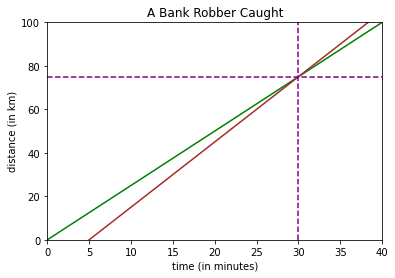

In [16]:
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0, 40, 1000) # start, finish, n points

#Distance travelled by robber:  d=2.5t
d_r = 2.5 * t 

#Distance travelled by sheriff:  d=3(t−5)
d_s = 3 * (t-5)

fig, ax = plt.subplots()
plt.title('A Bank Robber Caught')
plt.xlabel('time (in minutes)')
plt.ylabel('distance (in km)')
ax.set_xlim([0, 40])
ax.set_ylim([0, 100])
ax.plot(t, d_r, c='green')
ax.plot(t, d_s, c='brown')
plt.axvline(x=30, color='purple', linestyle='--')
_ = plt.axhline(y=75, color='purple', linestyle='--')

In [22]:
x = 25

In [21]:
type(x)

int

In [20]:
y = 3

In [23]:
py_sum = x + y
py_sum

28

In [25]:
x_float = 25.0
float_sum = x_float + y
float_sum

28.0

In [27]:
type(float_sum)

float

Scalars in PyTorch
PyTorch and TensorFlow are the two most popular automatic differentiation libraries (a focus of the Calculus I and Calculus II subjects in the ML Foundations series) in Python, itself the most popular programming language in ML
PyTorch tensors are designed to be pythonic, i.e., to feel and behave like NumPy arrays
The advantage of PyTorch tensors relative to NumPy arrays is that they easily be used for operations on GPU (see here for example)
Documentation on PyTorch tensors, including available data types, is here

In [41]:
import numpy as np

tensor = np.array(25)
tensor.shape
()
tensor.ndim

0

In [47]:
n = 20
n2 = 30

print('The result is: %d' % (n2*n))

The result is: 600


In [16]:
# Model that predicts the duration of a song according to other features like the genre of music, the instrumentation, etc.
# Evaluate it at predicting the duration of a new song. 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Plot paramaters
                                          
sns.set()
#by the way, pylad is deprecated, using matpplotlib
%matplotlib  inline 
pylab.rcParams['figure.figsize'] = (4,4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0

#7(seven) dimensional model
errorModel1 = [22,-4,2,7,6,-3,12]
errorModel2 = [14,9,-13,19,8,-21,4]

#Calculating the norm of the error vector for each model
totalerrmod1 = np.sum(np.abs(errorModel1))
totalerrmod2 = np.sum(np.abs(errorModel2))


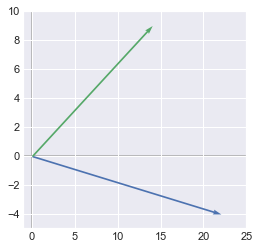

16.64331697709324

In [26]:
# Model that predicts the duration of a song according to other features like the genre of music, the instrumentation, etc.
# Evaluate it at predicting the duration of a new song. 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Plot paramaters
                                          
sns.set()
#by the way, pylad is deprecated, using matpplotlib
%matplotlib  inline 
pylab.rcParams['figure.figsize'] = (4,4)
plt.rcParams['xtick.major.size'] = 0
plt.rcParams['ytick.major.size'] = 0

#2 dimensional model
errorModel1 = [22,-4]
errorModel2 = [14,9]

def plotVectors(vecs,cols,alpha=1):
    """    Plot set of vectors.

    Parameters
    ----------
    vecs : array-like
        Coordinates of the vectors to plot. Each vector is in an array. For
        instance: [[1, 3], [2, 2]] can be used to plot 2 vectors.
    cols : array-like
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
    alpha : float
        Opacity of vectors

    Returns:

    fig : instance of matplotlib.figure.Figure
        The figure of the vectors"""
    
    plt.axvline(x=0, color='#A9A9A9',zorder = 0)
    plt.axhline(y=0, color='#A9A9A9',zorder = 0)
    
    for i in range(len(vecs)):
        if (isinstance(alpha,list)):
            alpha_i = alpha[i]
        else:
            alpha_i = alpha
        if (len(vecs[i])==2):
            x = np.concatenate([[0,0],vecs[i]])
        elif (len(vecs[i])==4):
            x = vecs[i]
        plt.quiver([x[0]],
                   [x[1]],
                   [x[2]],
                   [x[3]],
                  angles = 'xy',scale_units = 'xy',scale=1,color=cols[i],alpha=alpha_i)
        
        
plotVectors([errorModel1,errorModel2],[sns.color_palette()[0],sns.color_palette()[2]])

plt.xlim(-1,25)
plt.ylim(-5,10)
plt.show()

# Length of the vector errorModel1
np.sqrt(errorModel1[0] ** 2 + errorModel1[1] ** 2)

# Length of the vector errorModel2
np.sqrt(errorModel2[0] ** 2 + errorModel2[1] ** 2)

In [ ]:

plotVectors([vector1, vector2], ['red', 'blue'])

u = np.array([3,4])
plt.ylim(-1,5)
plt.xlim(-1,5)
plotVectors([u], [sns.color_palette()[0]])

In [ ]:
x = 25
x

In [ ]:
type(x)

In [ ]:
y = 3

In [ ]:
py_sum = x+y
py_sum

In [ ]:
type(py_sum)

In [ ]:
x_float = 25.0
float_sum = x_float + y
float_sum

In [ ]:
#Creating a scalar

import torch
xxx = torch.tensor(25)
xxx

In [ ]:
xxx.shape

In [3]:
import tensorflow as tf

In [2]:
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4848 sha256=f277364eb4601f9668c0085661871bb90e6d38073641e1fd71885a20300d7745
  Stored in directory: c:\users\thefa\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor


In [ ]:
xxx_tf = tf.Variable(25, dtype=tf.int32)
xxx_tf

In [ ]:
xxx.shape

In [ ]:
yyy_tf = tf.Variable(3, dtype=tf.int32)

In [ ]:
xxx_tf + yyy_tf

In [ ]:
soma = xxx_tf + yyy_tf
soma

In [ ]:
soma.numpy()

In [ ]:
type(soma.numpy())

In [ ]:
xxxf_tf = tf.Variable(25, dtype=tf.float32)
xxxf_tf

VECTOR

--One-dimensional array of numbers --Denoted in lowercase,italics,bold --Arranged in an order,so element can be accessed by its index Elementes are scalars so not bold,e.g, second element of *x** is x² --Representing a point in space: *Vector of lenght two represents location in 2d matrix *Length of three represents location in 3d mode
*Lenght of n repreents location in n-dimensional tensor

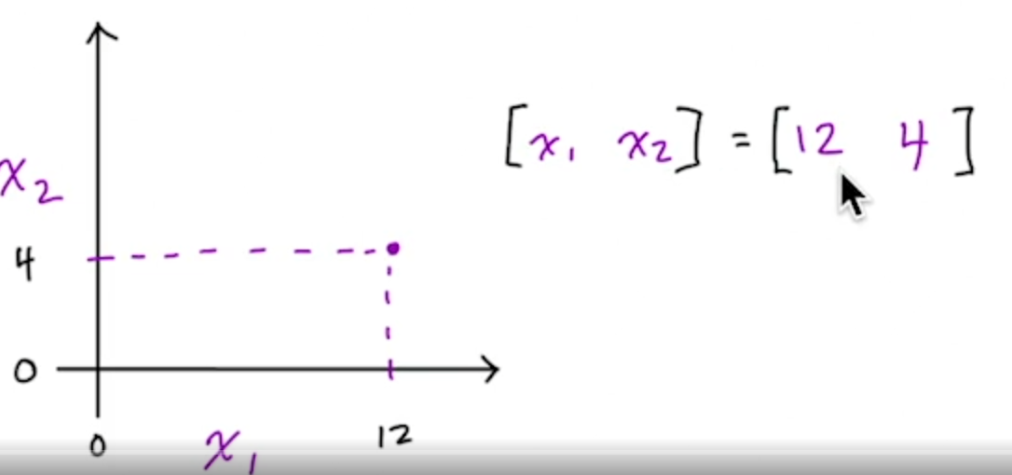

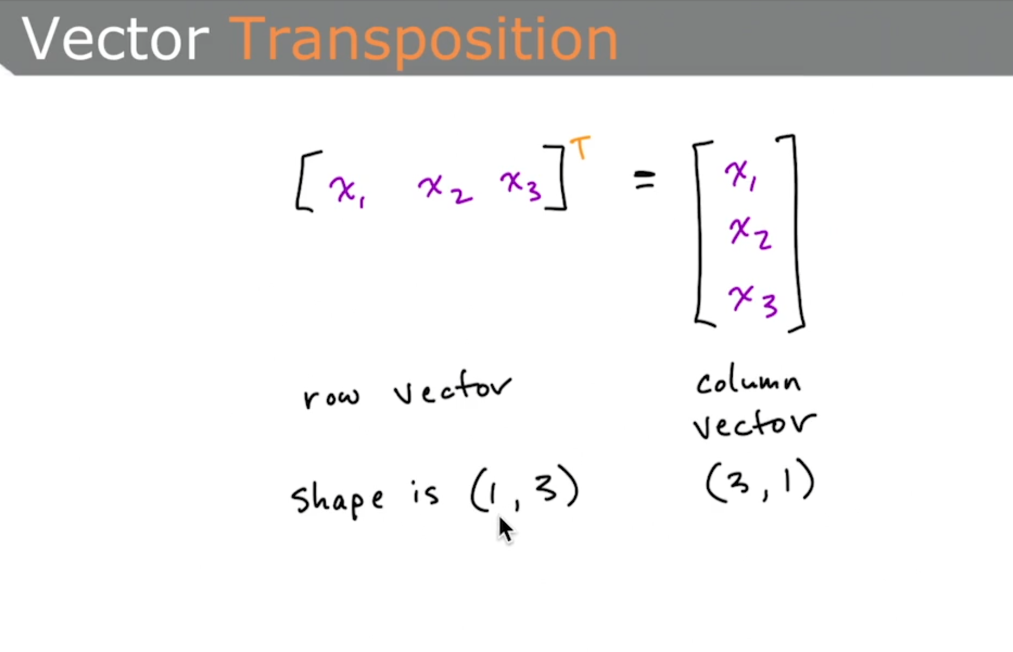

In [5]:
 #Vectors(Rank 1 Tensors) in NumPy

import numpy as np

 x= np.array([25,2,5])#type argument is optional e.g: dtype = np.float32
 x

array([25,  2,  5])

In [ ]:
len(x)

In [ ]:
type(x)

In [ ]:
x[0]

In [ ]:
type(x[0])

In [ ]:
#Vector Transposition
#Transposing a regular 1-D array has no effect
xt = x.T
xt

In [ ]:
xt.shape

In [ ]:
y = np.array([[25,2,5]])#double brackets can make double-dimensional "matrix-style"
y

In [ ]:
y.shape #row vector

In [ ]:
y.T #column vector

In [ ]:
#Zero vectors
#Have no effect if added to another vector
z = np.zeros(3)
z

In [ ]:
#Vectors in pytorch and tensorflow
import torch
import tensorflow as tf


xx = torch.tensor([25,2,5])
xx




In [ ]:

xx_tf = tf.Variable([25,2,5])
xx_tf

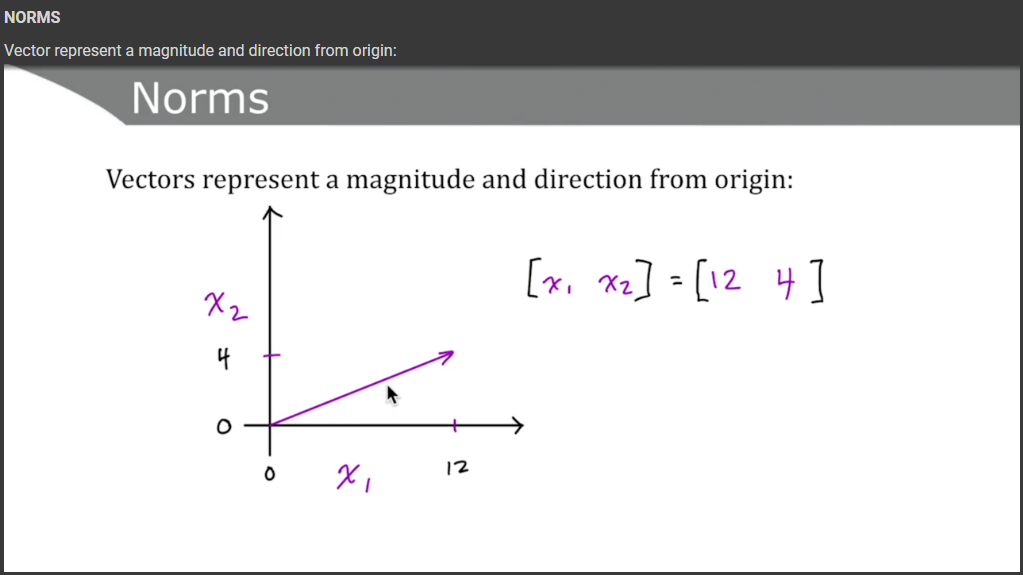

In [ ]:
#Norms are functions that quantify vector magnitude or vector length
#L² norm are the most common norm in machine learning
#The length of a vector can be calculated using the L2 norm, where the 2 is a superscript of the L, e.g. L^2.
#The notation for the L2 norm of a vector is ||v||2 where 2 is a subscript.

#notated as: l2(v) = ||v||2
#||v||2 = sqrt(a1^2 + a2^2 + a3^2)
#Measures simple(Euclidean) distance from origin

In [ ]:
x

In [ ]:
(25 ** 2 + 2**2 + 5 **2) ** (1/2) #formula

In [ ]:
#In NumPy you can calculate this expression easily by using the following command:

np.linalg.norm(x)

In [ ]:
#So, if units in this 3-dimensional vector space are meters, then the vector x has a length of 25.6m

In [ ]:
#Unit Vectors
#special case of vector where its length is equal to one
#Technically,x is a unit vector with "unit norm" ||x|| = 1



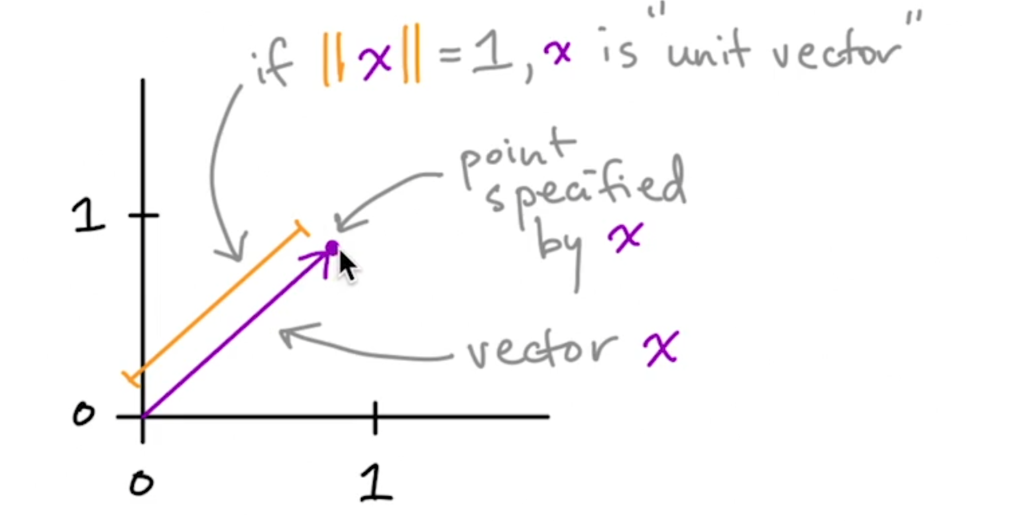

In [ ]:
"""Vector L1 Norm
The length of a vector can be calculated using the L1 norm, where the 1 is a superscript of the L, e.g. L^1.

The notation for the L1 norm of a vector is ||v||1, where 1 is a subscript. As such, this length is sometimes called the taxicab norm or the Manhattan norm."""

#l1(v) = ||v||1
#

np.abs(25)+ np.abs(2) + np.abs(5)

In [ ]:
"""Squared L² Norm"""
#The squared Euclidean norm is widely used in machine learning partly because it can be calculated with the vector operation. There can be performance gain due to optimization.

In [ ]:
(25 ** 2 + 2**2 + 5 **2) #squarred L² Norm

In [ ]:
np.dot(x,x)

In [ ]:
""" Max Norm or L infinity Norm"""
#returns the absolute value of the largest-magnitude element


In [ ]:
"""Generalized Lp Norm"""

#p must a real number,greater than or equal to one,can derive L1,l2 norm formulae by substituting for p,norms particularly L1 and l2 are used to regularize objective functions


In [ ]:
#Orthogonal Vectors
#Are at 90º angle to eatch other(assuming non-zero norms)
#n-dimensional space  has max n mutually orthogonal vector(assuming non-zero norms)
#Orthonormal vectors are orthogonal and all have unit norm
    *basis vectors are an example

In [ ]:
i = np.array([1,0])
i

In [ ]:
j = np.array([0,1])
j

MATRICES Two-dimensional array of numbers denoted in uppercase,italics,bold, eg: X Height given priority ahead of width in notation if X has three rows and two clumns,its shape is 3,2 Individual scalar elements denoted in uppercase,italics only element in topr ight coer of matrix X above would be X COLON represents an entire row or column: left column of matrix X is X1 middle row of matrix X is X2

In [ ]:
X = np.array([[25,2],[5,26],[3,7]]) #we must use double brackets, the outer bracket denotes the entire matrix,and we can use commas to separate the rows from columns, the inner bracket denotes the elements that it'll be in use

In [ ]:
X #first elements it will be first row,second row and bottom row

In [ ]:
X.shape

In [ ]:
X.size


In [ ]:
X[:,0]# slicing, select left column of matrix X

In [ ]:
X[:,1]# middle row

In [ ]:
X[0:2, 0:2]

In [7]:
#PYTORCH

xpt = torch.tensor([[25,2],[5,26],[3,7]])
xpt

NameError: name 'torch' is not defined

In [ ]:
xpt.shape

In [6]:
xpt[:,1]

NameError: name 'xpt' is not defined

In [ ]:
xtf = tf.Variable([[25,2],[5,26],[3,7]])

In [ ]:
xtf

In [ ]:
#Genertic tensor notation

Upper case,bold,italics,sans serif X


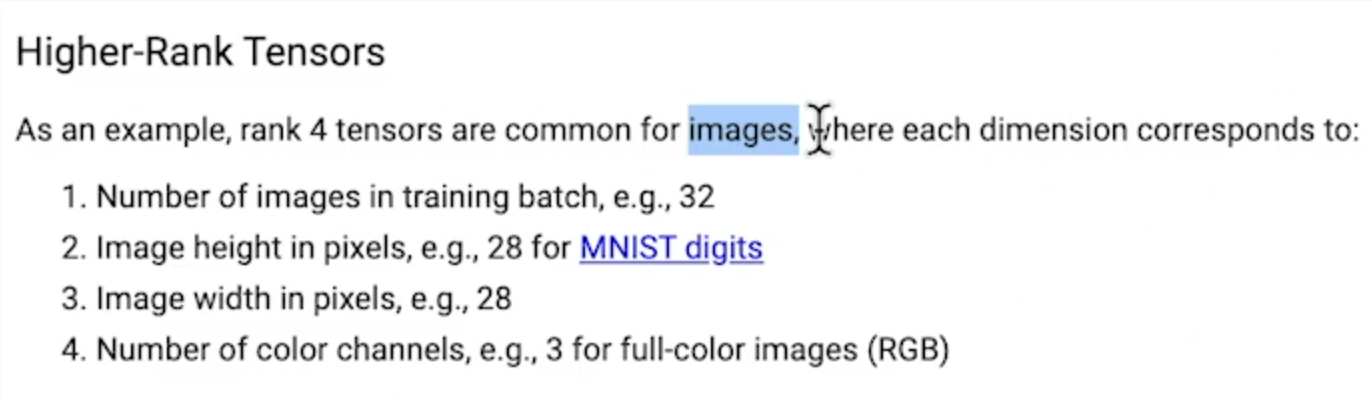

In [12]:
import torch
import numpy
import tensorflow as tf
imagespt = torch.zeros([32,45,21,45])

In [14]:
imagestf = tf.zeros([32,45,21,45])
imagestf

<tf.Tensor: shape=(32, 45, 21, 45), dtype=float32, numpy=
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ...,

In [17]:
x = np.array([25,2,-3,-23]) #transposition, capital T notation


array([ 25,   2,  -3, -23])

In [18]:
x.T

array([ 25,   2,  -3, -23])

In [20]:
y = np.array([[42,-99],[4,-3],[7,17],[99,22]]) #
y.shape

(4, 2)

In [21]:
y.size

8

In [22]:
y.T #Y position 

array([[ 42,   4,   7,  99],
       [-99,  -3,  17,  22]])

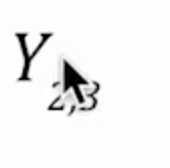

In [ ]:
#Tensor transposition

Transpose of scalar itself x.T = x
Transpose of vector,converts column to row(and vice-versa)
Scalar and vector transposition are special cases of matrix transposition[Flip of axes over main diagonal axis]

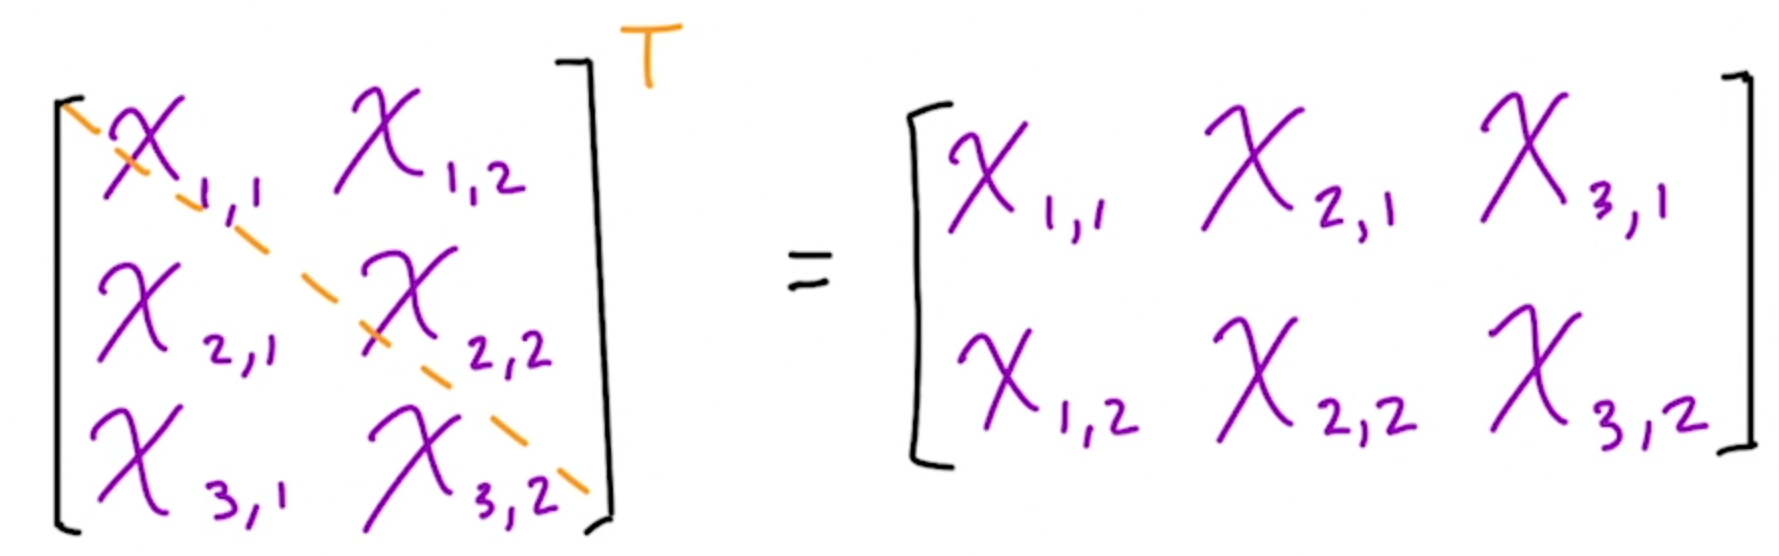

In [25]:
#Tensor transposition

X = np.array([[25,2],[5,26],[3,7]])

In [26]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [29]:
Xtf = ([[25,2],[5,26],[3,7]]) #tensorflow
Xtf = tf.transpose(Xtf)
Xtf

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[25,  5,  3],
       [ 2, 26,  7]])>

In [30]:
xpt = torch.tensor([[25,2],[5,26],[3,7]]) #pytorch
xpt

tensor([[25,  2],
        [ 5, 26],
        [ 3,  7]])

In [31]:
X*2
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [32]:
X+2
X

array([[25,  2],
       [ 5, 26],
       [ 3,  7]])

In [33]:
X.T

array([[25,  5,  3],
       [ 2, 26,  7]])

In [34]:
X*2+2

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [35]:
X.shape

(3, 2)

In [36]:
torch.add(torch.mul(xpt,2),2)

tensor([[52,  6],
        [12, 54],
        [ 8, 16]])

In [37]:
Xtf*2+2

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[52, 12,  8],
       [ 6, 54, 16]])>

In [39]:
Xtf = tf.add(tf.multiply(Xtf,2),2)
Xtf

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[106,  26,  18],
       [ 14, 110,  34]])>

In [ ]:
""If two tensor have the same size,operations are often by defaulty applied element-wise.This is not matrix multiplication,rather is called the "HADAMARD PRODUCT" or simply "element-wise product"

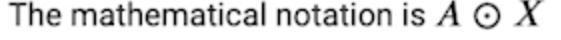

In [40]:
A = X + 2 #Hadamard operation
A

array([[27,  4],
       [ 7, 28],
       [ 5,  9]])

In [41]:
A + X

array([[52,  6],
       [12, 54],
       [ 8, 16]])

In [42]:
A * X

array([[675,   8],
       [ 35, 728],
       [ 15,  63]])

In [44]:
APT = xpt + 2
APT

tensor([[27,  4],
        [ 7, 28],
        [ 5,  9]])

In [45]:
APT * xpt

tensor([[675,   8],
        [ 35, 728],
        [ 15,  63]])

In [47]:
Atf = Xtf + 2
Atf

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[108,  28,  20],
       [ 16, 112,  36]])>

REDUCTION

Calculatin the sum across all elements of a tensor is a commmon operation.
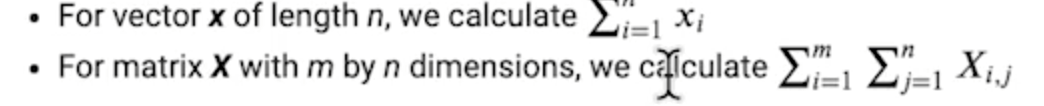

In [48]:
X.sum()

68

In [49]:
torch.sum(xpt)

tensor(68)

In [50]:
tf.reduce_sum(Xtf)

<tf.Tensor: shape=(), dtype=int32, numpy=308>

X.sum(axis = 0) #height takes priority 

In [52]:
X.sum(axis = 1) #summing all columns

array([27, 31, 10])

In [53]:
torch.sum(xpt,0)

tensor([33, 35])

In [54]:
tf.reduce_sum(Xtf,0)

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([120, 136,  52])>

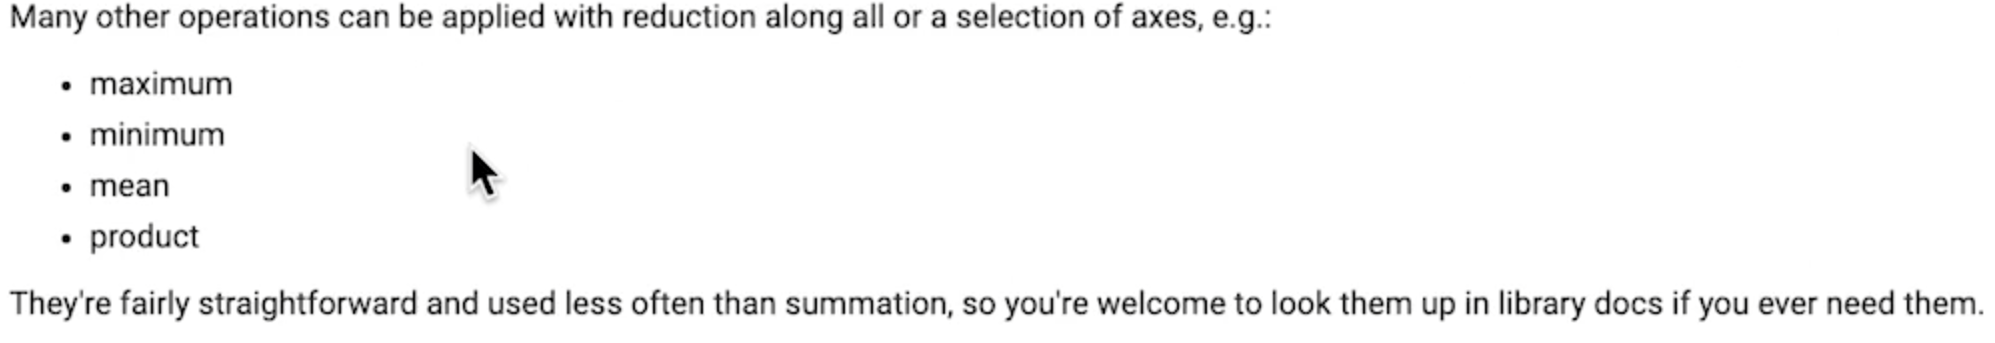

THE DOT PRODUCT

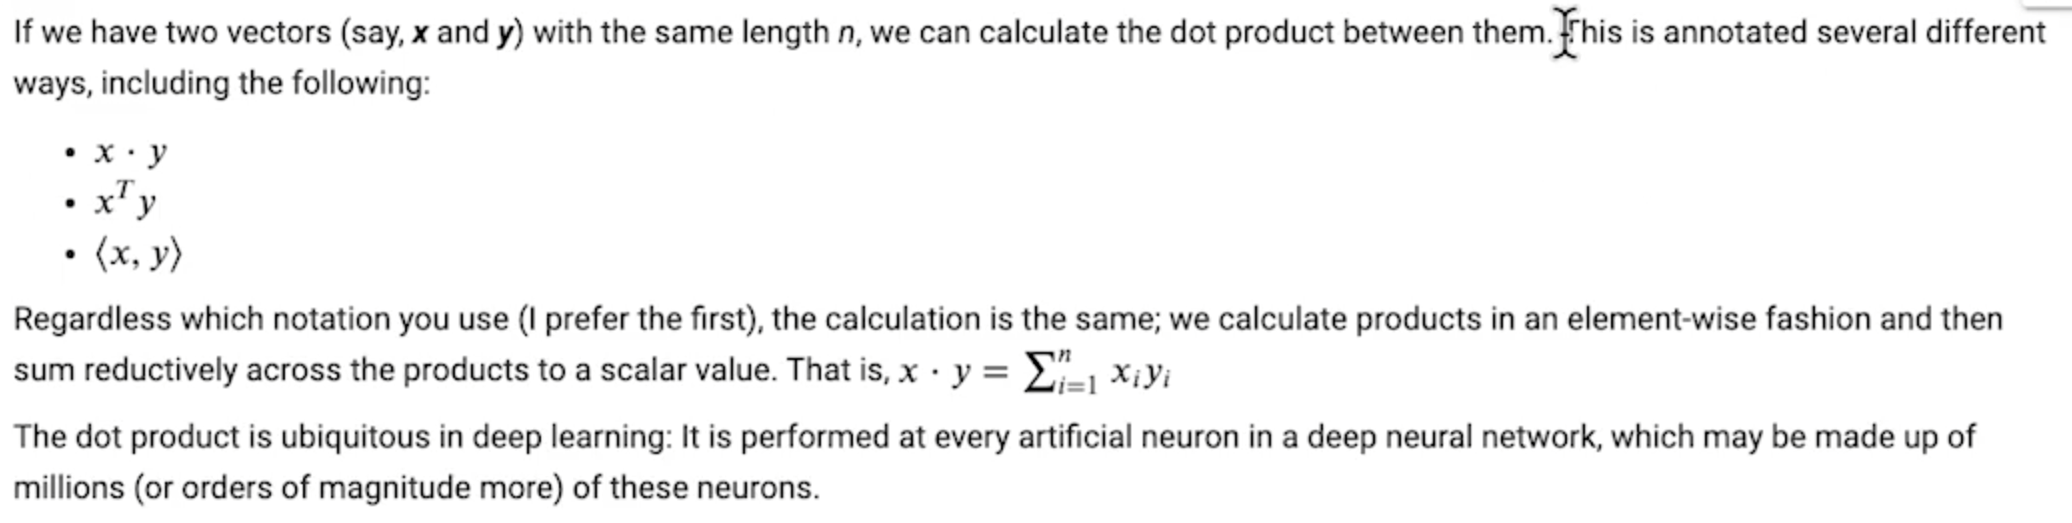

In [63]:
x = np.array([25,2,5])

In [62]:
y = np.array([0,1,2])
y

array([0, 1, 2])

In [58]:
25*0+2*1+5*2

12

In [64]:
np.dot(x,y)

12

In [65]:
xpt = torch.tensor([25,2,5])
ypt = torch.tensor([0,1,2])
np.dot(xpt,ypt)

12

In [66]:
torch.dot(torch.tensor([25,2,5]),torch.tensor([0,1,2]))

tensor(12)

In [68]:
xtf = tf.Variable([25,2,5])
ytf = tf.Variable([0,1,2])

In [70]:
tf.reduce_sum(tf.multiply(xtf,ytf))

<tf.Tensor: shape=(), dtype=int32, numpy=12>

'''''''''''''''''''

Key Concepts:
    tensor:
        scalar
        vector
        matrix
            matrix multiplication
            symmetric
            identity
        n-tensor
Transposition
Norm
Hadamard Prod
Dot product

In [71]:
#Exercise

y = np.array([[42,-99],[4,-3],[7,17],[99,22]])

In [72]:
y.T

array([[ 42,   4,   7,  99],
       [-99,  -3,  17,  22]])

In [77]:
xc = np.array([[25,-2],[10,1]])
xv = np.array([[-1,10],[7,8]])

In [75]:
xc.shape

(2, 2)

In [76]:
xc.T

array([[25, 10],
       [-2,  1]])

In [78]:
xc * xv

array([[-25, -20],
       [ 70,   8]])

In [79]:
w = [-1,2,-2]
s = [5,10,0]

In [80]:
np.dot(w,s)

15

MATRIX MULTIPLICATION BY VECTOR
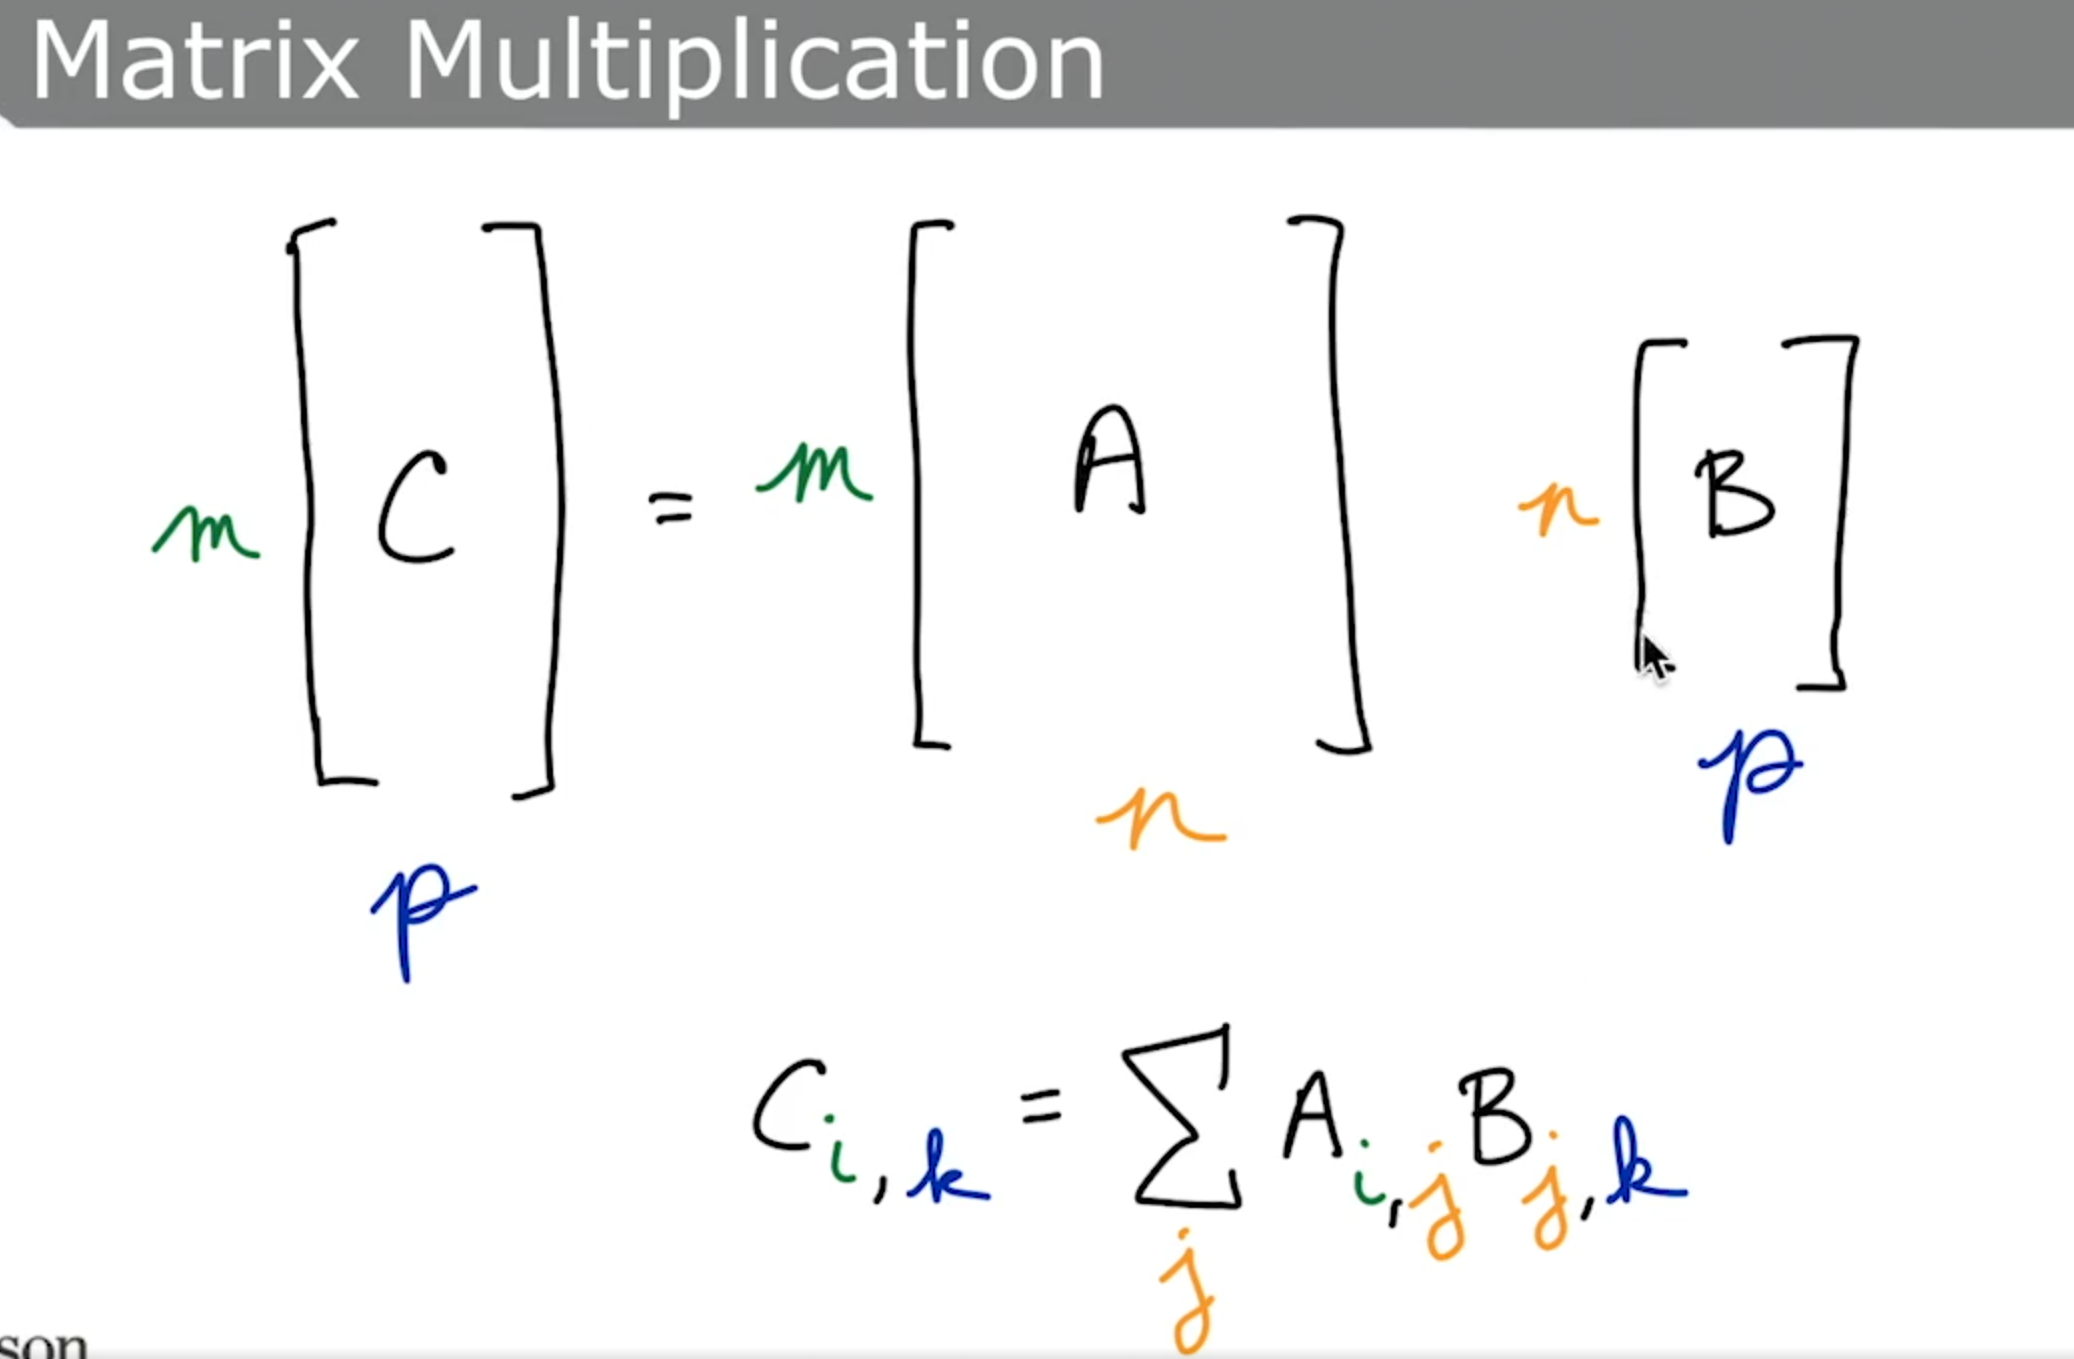

In [88]:
xm = np.array([[3,4],[5,6],[7,8]]) #Matrix xm
xm

array([[3, 4],
       [5, 6],
       [7, 8]])

In [90]:
xz = np.array([1,2]) #vector xz

In [91]:
np.dot(xm,xz) #np.dot is also used for matrix multiplication even though is also used to do dot procuct operations

array([11, 17, 23])

In [93]:
xt = torch.tensor([[3,4],[5,6],[7,8]]) #Matrix xt
xt

tensor([[3, 4],
        [5, 6],
        [7, 8]])

In [94]:
yt = torch.tensor([1,2])

In [95]:
torch.matmul(xt,yt) #pytorch method matmul is used to calculate matrix multiplications

tensor([11, 17, 23])

In [96]:
xtf = tf.Variable([[3,4],[5,6],[7,8]])
ytf = tf.Variable([1,2])

In [97]:
tf.linalg.matvec(xtf,ytf) #tensorflow matrix multiplication by vector

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([11, 17, 23])>

In [104]:
'matrix by matrix multiplication'
#numpy
XM = np.array([[3,4],[5,6],[7,8]])
XZ = np.array([[1,9],[2,0]])

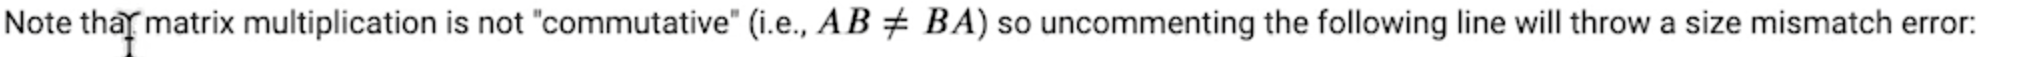

In [106]:
np.dot(XZ,XM)

ValueError: shapes (2,2) and (3,2) not aligned: 2 (dim 1) != 3 (dim 0)

In [112]:
TB = torch.from_numpy(XZ)  #from_numpy method conversion, MUCH MUCH CLEANER 
TA= torch.from_numpy(XM)

In [113]:
torch.matmul(TA,TB)

tensor([[11, 27],
        [17, 45],
        [23, 63]], dtype=torch.int32)

In [115]:
#Another way to create the same tensor with transposition

bpt = torch.tensor([[1,2],[9,0]]).T
bpt

tensor([[1, 9],
        [2, 0]])

In [117]:
"tensorflow"
"convert_to_tensor method"
atf = tf.convert_to_tensor(TA,dtype=tf.int32)
btf = tf.convert_to_tensor(TB,dtype=tf.int32)

In [118]:
tf.matmul(atf,btf)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[11, 27],
       [17, 45],
       [23, 63]])>

In [ ]:
"SYMMETRIC MATRICES"

Special matrix case with following properties:
    must be a square
    X.T = X
    anything in main dialgonal can be unique
    anything off main diagonal 
    It is needed to have the elements off the main diagonal mirroring to each other

In [119]:
X_sym = np.array([[0,1,2],[1,7,8],[2,8,9]])
X_sym

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [120]:
X_sym.T

array([[0, 1, 2],
       [1, 7, 8],
       [2, 8, 9]])

In [121]:
X_sym.T == X_sym

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [122]:
"IDENTITY MATRICES"

Symmetry matrix where:
    Every element along main diagonal is 1
    all other elements are 0
    Notation: I,n where n = height(or width)
    n-lenght vector unchanged if multiplied by I,n

'IDENTITY MATRICES'

In [123]:
I = np.array([[1,0,0],[0,1,0],[0,0,1]])
I

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [124]:
xp = np.array([25,2,5])
xp

array([25,  2,  5])

In [125]:
np.dot(I,xp) #Identity matrix multiplication

array([25,  2,  5])

In [129]:
#Exercise

XP = np.array([[0,1,2],[3,4,5],[6,7,8]])
XT = np.array([-1,1,-2])

In [130]:
np.dot(XP,XT) #matrix by matrix multiplication on numpy

array([ -3,  -9, -15])

In [131]:
np.dot(I,XT)# Identity matrix multiplication by vector

array([-1,  1, -2])

In [135]:
xtf = torch.tensor([[0,1,2],[3,4,5],[6,7,8]])
ytf = torch.tensor([[-1,0],[1,1],[-2,2]])

In [136]:
torch.matmul(xtf,ytf)

tensor([[ -3,   5],
        [ -9,  14],
        [-15,  23]])

#Machine learning Application

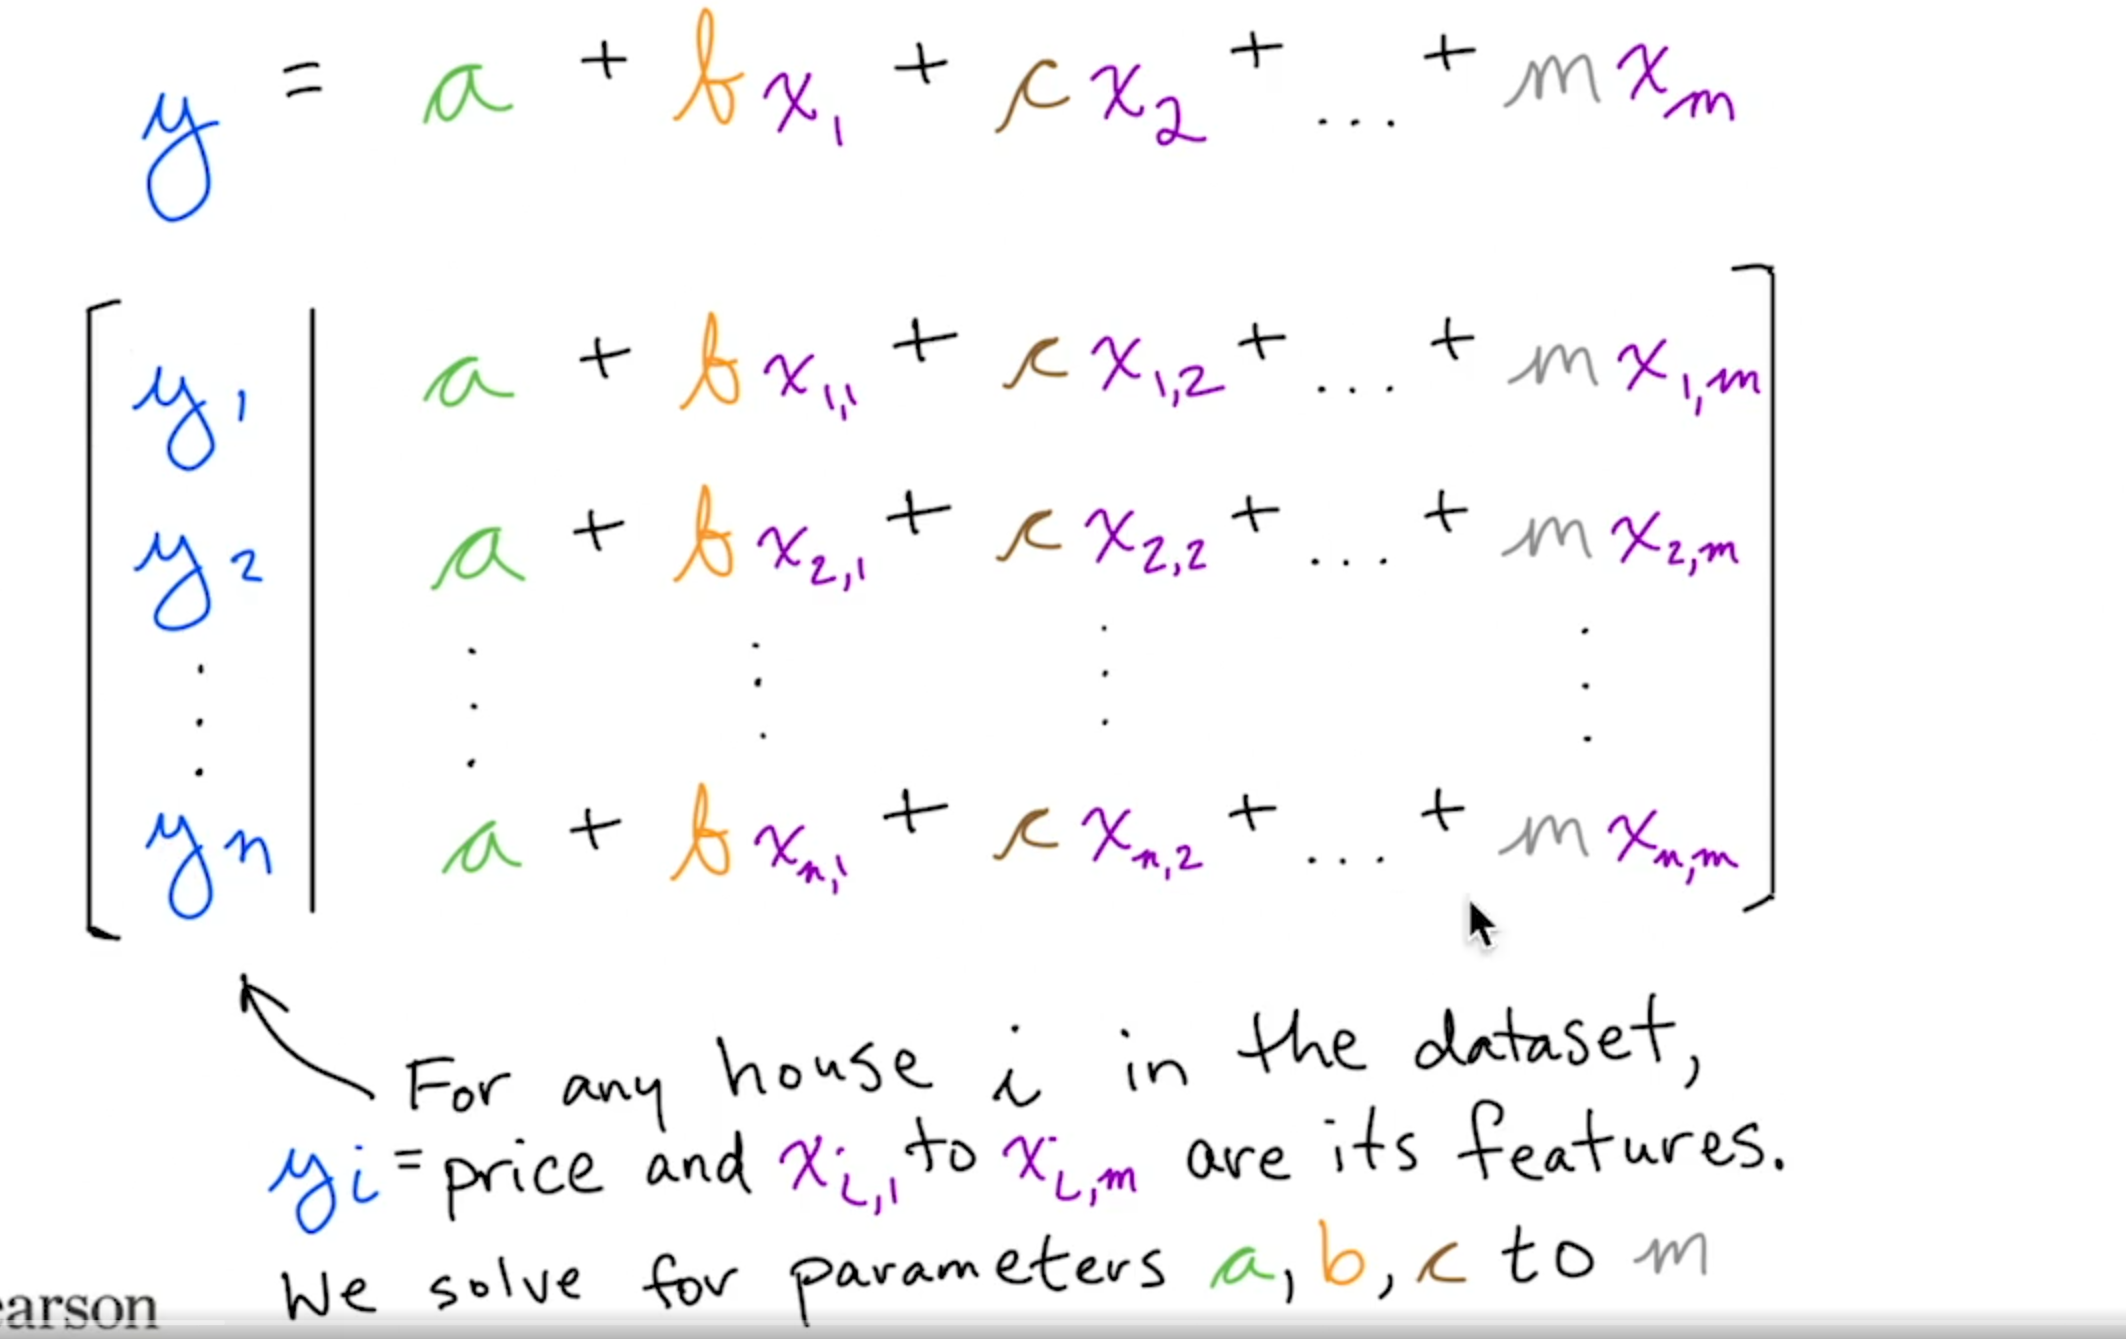

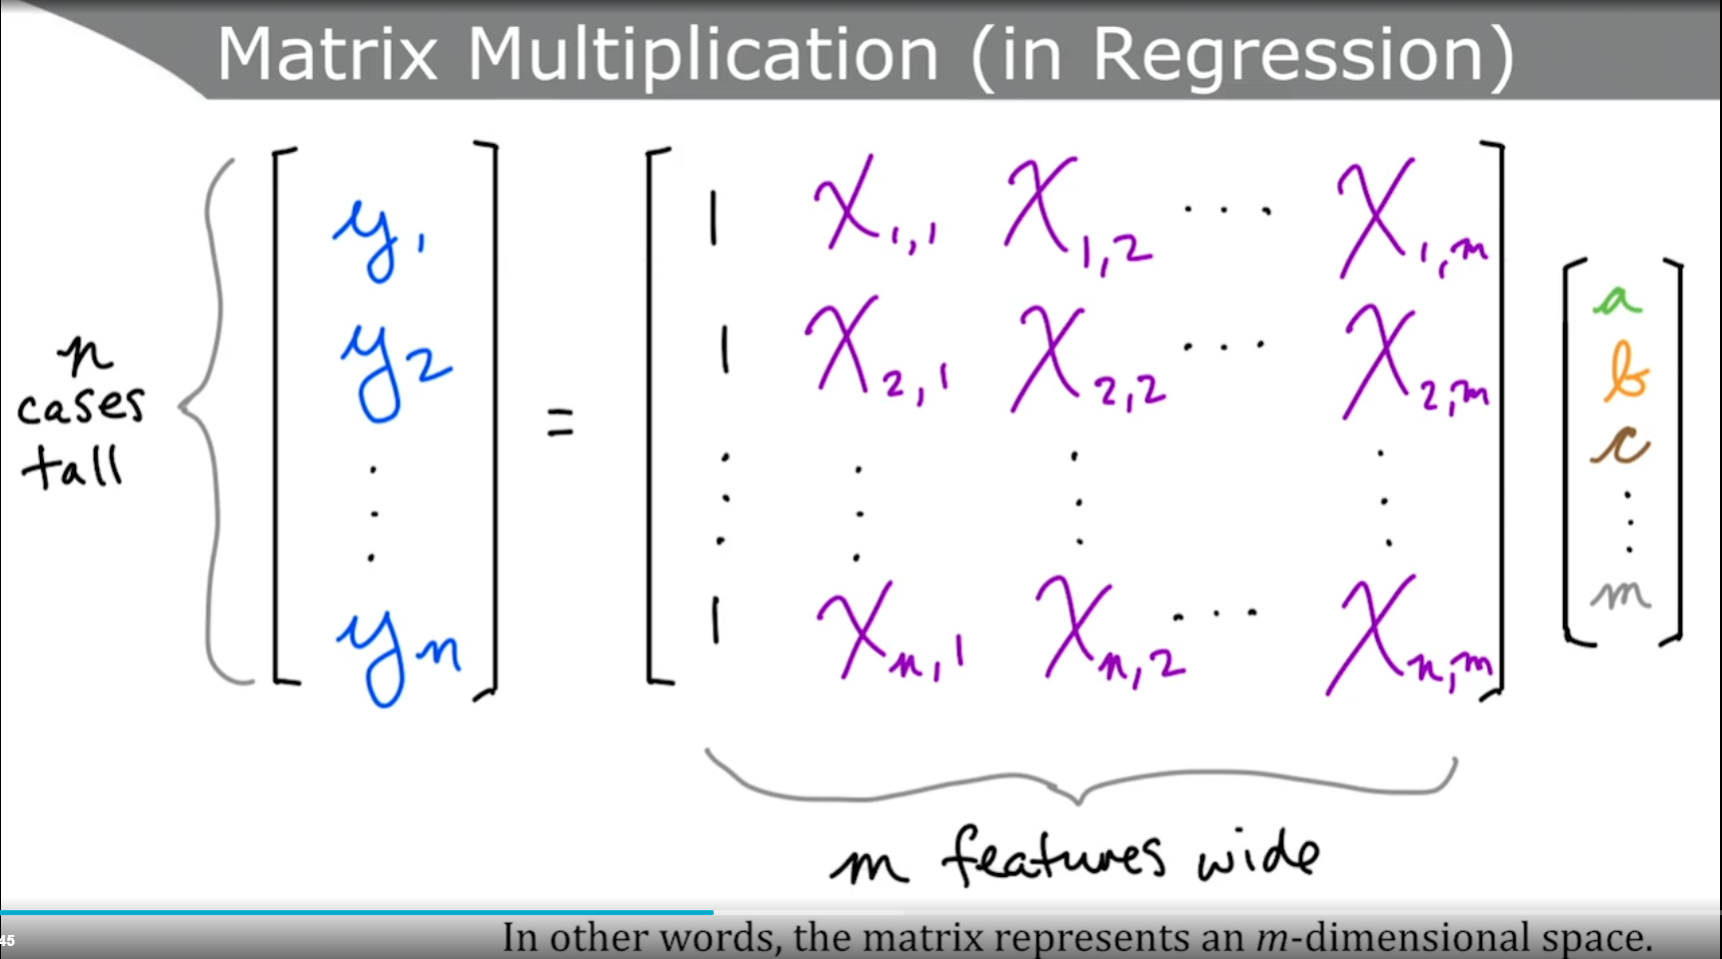

[]


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

baseurl = "https://www.thewhiskyexchange.com"

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}
productlinks = []
data=[]
for x in range(1,6):
    k = requests.get('https://www.thewhiskyexchange.com/c/35/japanese-whisky?pg={}&psize=24&sort=pasc'.format(x)).text
    soup=BeautifulSoup(k,'html.parser')
    productlist = soup.find_all("li",{"class":"product-grid__item"})
    for product in productlist:
        link = product.find("container").get('href')
        productlinks.append(baseurl + link)




for link in productlinks:
    f = requests.get(link,headers=headers).text
    hun=BeautifulSoup(f,'html.parser')

    try:
        price = hun.find("p",{"class":"product-action__price"}).text.replace('\n'," ")
    except:
        price = None

    try:
        about = hun.find("div",{"class":"product-main__description"}).text.replace('\n'," ")
    except:
        about = None

    try:
        rating = hun.find("div",{"class":"review-overview"}).text.replace('\n'," ")
    except:
        rating = None

    try:
        name = hun.find("h1",{"class":"product-main__name"}).text.replace('\n'," ")
    except:
        name = None

    whisky = {"name":name,"price":price,"rating":rating,"about":about}
    list(whisky.keys())
    list(whisky.values())
    data.append(whisky)


df = pd.DataFrame(data)

print(df)

nome_arquivo = 'Whisky.txt'

with open(nome_arquivo,'w') as fp:
    fp.write('\n \n'.join(str(x)for x in data))
